# **Implementing KNN**

---



In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
%matplotlib inline

In [2]:
df = pd.read_csv('https://drive.google.com/uc?export=view&id=1EVKHAWTE0hnBN2IuOLdFtWImGgcuqejJ')
df.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [3]:
df = pd.DataFrame(df)
df = df.drop('Id', axis =1)
df

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,5.2,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica


In [4]:
df0 = df[df['Species'] == 'Iris-setosa']
df1 = df[df['Species'] == 'Iris-versicolor']
df2 = df[df['Species'] == 'Iris-virginica']

In [5]:
mapping = {'Iris-setosa':1, 'Iris-versicolor':2, 'Iris-virginica':3}
df['Species_Number'] = df['Species'].map(mapping)
df = df.drop('Species', axis =1)
df

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species_Number
0,5.1,3.5,1.4,0.2,1
1,4.9,3.0,1.4,0.2,1
2,4.7,3.2,1.3,0.2,1
3,4.6,3.1,1.5,0.2,1
4,5.0,3.6,1.4,0.2,1
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,3
146,6.3,2.5,5.0,1.9,3
147,6.5,3.0,5.2,2.0,3
148,6.2,3.4,5.4,2.3,3


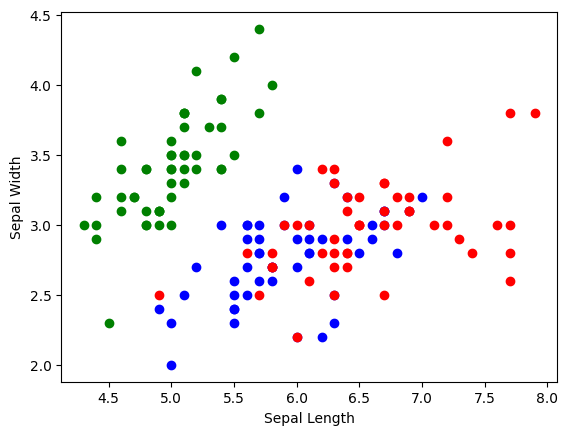

In [6]:

plt.xlabel('Sepal Length')
plt.ylabel('Sepal Width')
plt.scatter(df0['SepalLengthCm'], df0['SepalWidthCm'], color='green')
plt.scatter(df1['SepalLengthCm'], df1['SepalWidthCm'], color='blue')
plt.scatter(df2['SepalLengthCm'], df2['SepalWidthCm'], color='red')

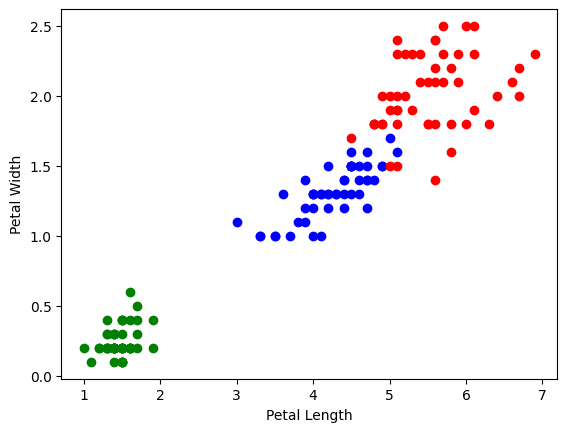

In [7]:
plt.xlabel('Petal Length')
plt.ylabel('Petal Width')
plt.scatter(df0['PetalLengthCm'], df0['PetalWidthCm'], color='green')
plt.scatter(df1['PetalLengthCm'], df1['PetalWidthCm'], color='blue')
plt.scatter(df2['PetalLengthCm'], df2['PetalWidthCm'], color='red')

In [8]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.neighbors import KNeighborsClassifier
import seaborn as sn

In [9]:
from sklearn.preprocessing import StandardScaler

In [10]:
scaler = StandardScaler()


In [11]:
scaler.fit(df.drop('Species_Number',axis=1))

StandardScaler()

In [12]:
scaled_features = scaler.transform(df.drop('Species_Number',axis=1))

In [13]:
df_feat = pd.DataFrame(scaled_features,columns=df.columns[:-1])
df_feat.head()


,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
0,-0.900681,1.032057,-1.341272,-1.312977
1,-1.143017,-0.124958,-1.341272,-1.312977
2,-1.385353,0.337848,-1.398138,-1.312977
3,-1.506521,0.106445,-1.284407,-1.312977
4,-1.021849,1.263460,-1.341272,-1.312977


In [14]:
X_train, X_test, y_train, y_test = train_test_split(scaled_features,df['Species_Number'].values,
                                                    test_size=0.30)



In [15]:
df_xtest = pd.DataFrame(X_test,columns=df.columns[:-1])
df_xtest.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
0,-1.021849,0.569251,-1.341272,-1.312977
1,0.674501,0.337848,0.421564,0.396172
2,-0.294842,-0.124958,0.421564,0.396172
3,-0.294842,-0.124958,0.194102,0.133226
4,0.310998,-1.050569,1.047087,0.264699


# **FROM SCRATCH**

In [16]:

from collections import Counter

def euclidean_distance(x1, x2):
    distance = np.sqrt(np.sum((x1-x2)**2))
    return distance

class KNN:
    def __init__(self, k=3):
        self.k = k

    def fit(self, X, y):
        self.X_train = X
        self.y_train = y

    def predict(self, X):
        predictions = [self._predict(x) for x in X]
        return predictions

    def _predict(self, x):
        # compute the distance
        distances = [euclidean_distance(x, x_train) for x_train in self.X_train]

        # get the closest k
        k_indices = np.argsort(distances)[:self.k]
        k_nearest_labels = [self.y_train[i] for i in k_indices]

        # majority voye
        most_common = Counter(k_nearest_labels).most_common()
        return most_common[0][0]

In [17]:
clf = KNN(1) # l


In [18]:
clf.fit(X_train , y_train)
pred_i = clf.predict(X_test)

In [19]:
print(confusion_matrix(y_test,pred_i))

[[16  0  0]
 [ 0 13  2]
 [ 0  2 12]]


In [20]:
print(classification_report(y_test,pred_i))

              precision    recall  f1-score   support

           1       1.00      1.00      1.00        16
           2       0.87      0.87      0.87        15
           3       0.86      0.86      0.86        14

    accuracy                           0.91        45
   macro avg       0.91      0.91      0.91        45
weighted avg       0.91      0.91      0.91        45



In [21]:
print(accuracy_score(y_test,pred_i))

0.9111111111111111


**Plotting k vs accuracy**

In [22]:
error_rate = []

# Will take some time
for i in range(1,40):
    clf =KNN(i)
    clf.fit(X_train,y_train)
    pred_i = clf.predict(X_test)
    error_rate.append(np.mean(pred_i != y_test))

Text(0, 0.5, 'Error Rate')

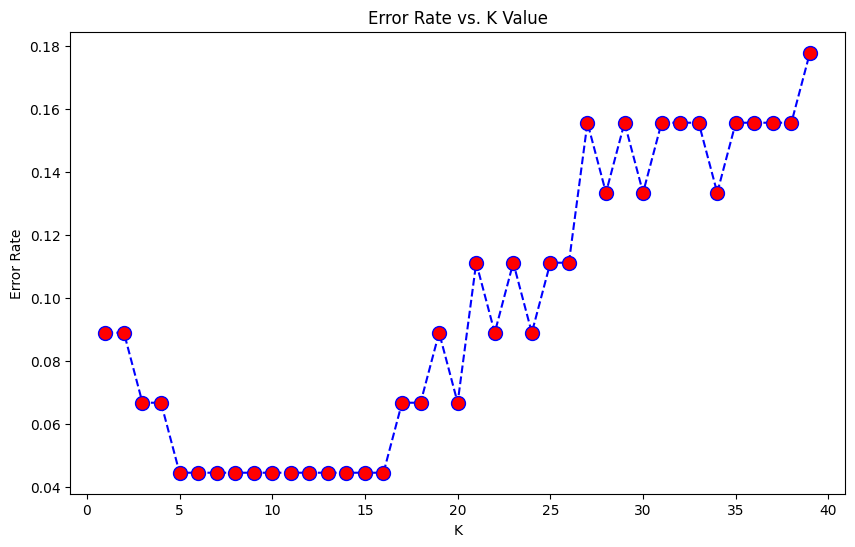

In [23]:
plt.figure(figsize=(10,6))
plt.plot(range(1,40),error_rate,color='blue', linestyle='dashed', marker='o',
         markerfacecolor='red', markersize=10)
plt.title('Error Rate vs. K Value')
plt.xlabel('K')
plt.ylabel('Error Rate')


In [24]:
# k= 5 to 18 is good //varying with cases
clf = KNN(12)
clf.fit(X_train, y_train)
pred_i = clf.predict(X_test)
print(confusion_matrix(y_test,pred_i))
print(classification_report(y_test,pred_i))
print(accuracy_score(y_test,pred_i))

[[16  0  0]
 [ 0 14  1]
 [ 0  1 13]]
              precision    recall  f1-score   support

           1       1.00      1.00      1.00        16
           2       0.93      0.93      0.93        15
           3       0.93      0.93      0.93        14

    accuracy                           0.96        45
   macro avg       0.95      0.95      0.95        45
weighted avg       0.96      0.96      0.96        45

0.9555555555555556


 # **USING SK LEARN**

In [25]:
knn = KNeighborsClassifier(n_neighbors=1)


In [26]:
knn.fit(X_train,y_train)

KNeighborsClassifier(n_neighbors=1)

In [27]:
pred = knn.predict(X_test)

In [28]:
print(confusion_matrix(y_test,pred))

[[16  0  0]
 [ 0 13  2]
 [ 0  2 12]]


In [29]:
print(classification_report(y_test,pred))


              precision    recall  f1-score   support

           1       1.00      1.00      1.00        16
           2       0.87      0.87      0.87        15
           3       0.86      0.86      0.86        14

    accuracy                           0.91        45
   macro avg       0.91      0.91      0.91        45
weighted avg       0.91      0.91      0.91        45



In [30]:
print(accuracy_score(y_test,pred))

0.9111111111111111


In [31]:
error_rate = []

# Will take some time
for i in range(1,40):

    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train,y_train)
    pred_i = knn.predict(X_test)
    error_rate.append(np.mean(pred_i != y_test))

Text(0, 0.5, 'Error Rate')

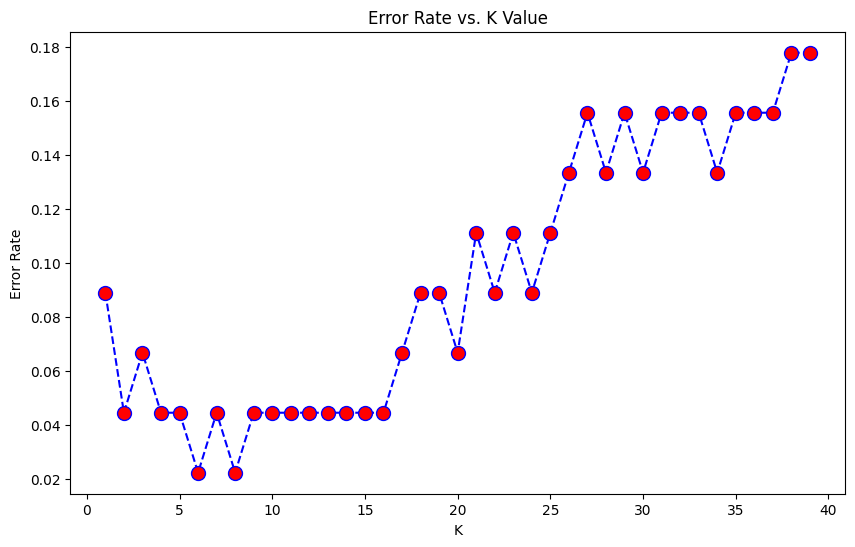

In [32]:
plt.figure(figsize=(10,6))
plt.plot(range(1,40),error_rate,color='blue', linestyle='dashed', marker='o',
         markerfacecolor='red', markersize=10)
plt.title('Error Rate vs. K Value')
plt.xlabel('K')
plt.ylabel('Error Rate')


In [33]:
# FIRST A QUICK COMPARISON TO OUR ORIGINAL K=1
knn = KNeighborsClassifier(n_neighbors=1)

knn.fit(X_train,y_train)
pred = knn.predict(X_test)

print('WITH K=1')
print('\n')
print(confusion_matrix(y_test,pred))
print('\n')
print(classification_report(y_test,pred))
print(accuracy_score(y_test,pred))

WITH K=1


[[16  0  0]
 [ 0 13  2]
 [ 0  2 12]]


              precision    recall  f1-score   support

           1       1.00      1.00      1.00        16
           2       0.87      0.87      0.87        15
           3       0.86      0.86      0.86        14

    accuracy                           0.91        45
   macro avg       0.91      0.91      0.91        45
weighted avg       0.91      0.91      0.91        45

0.9111111111111111


In [34]:
# NOW WITH K=12
knn = KNeighborsClassifier(n_neighbors=12)

knn.fit(X_train,y_train)
pred = knn.predict(X_test)

print('WITH K=12')
print('\n')
print(confusion_matrix(y_test,pred))
print('\n')
print(classification_report(y_test,pred))
print(accuracy_score(y_test,pred))

WITH K=12


[[16  0  0]
 [ 0 14  1]
 [ 0  1 13]]


              precision    recall  f1-score   support

           1       1.00      1.00      1.00        16
           2       0.93      0.93      0.93        15
           3       0.93      0.93      0.93        14

    accuracy                           0.96        45
   macro avg       0.95      0.95      0.95        45
weighted avg       0.96      0.96      0.96        45

0.9555555555555556
